# Tutorial: R and the Tidyverse

Welcome to the first tutorial worksheet for Data Science: A First Introduction!  There is a tutorial worksheet like this one corresponding to each chapter of the textbook. This tutorial covers the [R and the Tidyverse](https://datasciencebook.ca/intro.html) chapter of the online textbook, which also lists learning objectives. You should read the textbook chapter before attempting this tutorial worksheet. Tutorial worksheets generally have slightly harder questions than lecture worksheets. Some questions will be manually graded by the TAs, and there are also occasionally "hidden test" questions, where you can't check your answer in advance.

But as always: collaborating on these exercises is more than okay -- it's encouraged!

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Substitute the `fail() # No Answer - remove if you provide an answer` with your completed code and answers then proceed to run the cell.


In [1]:
### Run this cell before continuing. 
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

**Revision Question** Match the following definitions with the corresponding functions used in R:
<br> {points: 1}

*Definitions*

A. Reads the most common types of flat file data, comma separated values. 

B. Keeps only the variables you mention.

C. Keeps only rows with entries satisfying some logical condition that you specify.

D. Adds a new variable to a data frame as a function of the old columns.

E. Declares the input data frame for a graphic and specifies the set of plot aesthetics intended to be common throughout all subsequent layers unless specifically overridden.

*Functions*

1. `ggplot`
2. `select`
3. `filter`
4. `read_csv`
5. `mutate`

For each definition, assign the integer corresponding to the correct function to the letter object associated with the defintion. For example:

    B <- 1

*Assign your answers to the objects `A`, `B`, `C`, `D`, and `E`. Your answers should each be a single integer.*

In [2]:
# Replace the fail() with your answer. 

A<-4
B<-2
C<-3
D<-5
E<-1 # your code here
# No Answer - remove if you provide an answer

In [3]:
library(digest)
stopifnot("type of A is not numeric"= setequal(digest(paste(toString(class(A)), "2fff8")), "de244a826ac501a88fb8c4bb0d03b26f"))
stopifnot("value of A is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(A, 2)), "2fff8")), "f2b09bcda6c70af7e2fb337df6b2c68c"))
stopifnot("length of A is not correct"= setequal(digest(paste(toString(length(A)), "2fff8")), "fc44a50eb90fcb0dc704ee2c73284b82"))
stopifnot("values of A are not correct"= setequal(digest(paste(toString(sort(round(A, 2))), "2fff8")), "f2b09bcda6c70af7e2fb337df6b2c68c"))

stopifnot("type of B is not numeric"= setequal(digest(paste(toString(class(B)), "2fff9")), "747d87cc18e9777f299ec310abb7d4b5"))
stopifnot("value of B is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(B, 2)), "2fff9")), "7c015f8f067238550126f6b07b7a6861"))
stopifnot("length of B is not correct"= setequal(digest(paste(toString(length(B)), "2fff9")), "3a9291dd54100a74dbaf892dc5e8287a"))
stopifnot("values of B are not correct"= setequal(digest(paste(toString(sort(round(B, 2))), "2fff9")), "7c015f8f067238550126f6b07b7a6861"))

stopifnot("type of C is not numeric"= setequal(digest(paste(toString(class(C)), "2fffa")), "2d1837730813c4d0fbf2842da955403f"))
stopifnot("value of C is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(C, 2)), "2fffa")), "3ca6d40ed15ccb190c958536d98e299f"))
stopifnot("length of C is not correct"= setequal(digest(paste(toString(length(C)), "2fffa")), "b469a854c8f51c396401184c308717bf"))
stopifnot("values of C are not correct"= setequal(digest(paste(toString(sort(round(C, 2))), "2fffa")), "3ca6d40ed15ccb190c958536d98e299f"))

stopifnot("type of D is not numeric"= setequal(digest(paste(toString(class(D)), "2fffb")), "d9ace2ee36158dacb02ce38343f45176"))
stopifnot("value of D is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(D, 2)), "2fffb")), "042eba895fab97e9473eb1ac0b9aeff9"))
stopifnot("length of D is not correct"= setequal(digest(paste(toString(length(D)), "2fffb")), "e3918bf3dea3e130227ad88821c982cc"))
stopifnot("values of D are not correct"= setequal(digest(paste(toString(sort(round(D, 2))), "2fffb")), "042eba895fab97e9473eb1ac0b9aeff9"))

stopifnot("type of E is not numeric"= setequal(digest(paste(toString(class(E)), "2fffc")), "73067b1eede859aace934d53a60e7ed7"))
stopifnot("value of E is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(E, 2)), "2fffc")), "928813b3633f08b88e2e5df941b8fde0"))
stopifnot("length of E is not correct"= setequal(digest(paste(toString(length(E)), "2fffc")), "928813b3633f08b88e2e5df941b8fde0"))
stopifnot("values of E are not correct"= setequal(digest(paste(toString(sort(round(E, 2))), "2fffc")), "928813b3633f08b88e2e5df941b8fde0"))

print('Success!')

[1] "Success!"


## 1. Vickers and Vertosick Exercise
We hope you haven't forgotten about them just yet! As you might recall from lecture, Vickers and Vertosick were the researchers that wanted to study different factors affecting race performance of recreational runners. They assembled a data set that includes the age, sex, and Body Mass Index (BMI) of runners, comparing it with their timed performance (how long it took them to complete either 5 or 10 km runs).

We will be continuing our analysis of their data to practice what you learnt during the previous lecture. The goal for today, however, is to produce a plot of BMI against the time **(in minutes)** it took for participants **under the age of 35** to run 5 kilometres. To do this, we will need to complete the following steps:

1. use `filter` to extract the rows where age is less than 35
2. use `select` to extract the `bmi` and `km5_time_seconds` columns 
3. use `mutate` to convert 5 km race time from seconds (`km5_time_seconds`) to minutes
4. use `ggplot` to create our plot of BMI (x-axis) and race time in minutes (y-axis)

**Tips for success:** Try going through all of the steps on your own, but don't forget to discuss with others (classmates, TAs, or an instructor) if you get stuck. If something is wrong and you can't spot the issue, be sure to **read the error message carefully**. Since there are a lot of steps involved in working with data and modifying it, feel free to look back at the worksheet from this week for assistance. 

**Question 1.1** Multiple Choice
<br> {points: 1}

After reading the text above (and remembering that `filter` lets us choose rows that have values at, above, or below a threshold), what column do you think we will be using for our threshold when we filter? 

A. `age`

B. `km5_time_seconds`

C. `bmi`

D. `sex`

*Assign your answer to an object called `answer1.1`. Make sure to write the uppercase letter for the answer you have chosen and surround the letter with quotes.*

In [4]:
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

answer1.1<-"A"# your code here

# No Answer - remove if you provide an answer

In [5]:
library(digest)
stopifnot("type of answer1.1 is not character"= setequal(digest(paste(toString(class(answer1.1)), "bacc")), "d9c65aa0c2ae376af5c72f049e62e39d"))
stopifnot("length of answer1.1 is not correct"= setequal(digest(paste(toString(length(answer1.1)), "bacc")), "46db0350582115642d744df832d04308"))
stopifnot("value of answer1.1 is not correct"= setequal(digest(paste(toString(tolower(answer1.1)), "bacc")), "1eede81eef8e79eb7fc449a5214193c2"))
stopifnot("letters in string value of answer1.1 are correct but case is not correct"= setequal(digest(paste(toString(answer1.1), "bacc")), "943c3851d393387183b7158907170a17"))

print('Success!')

[1] "Success!"


**Question 1.2** True or False
<br> {points: 1}

We will be selecting the columns `age` and `km5_time_seconds` to plot. True or false?

*Assign your answer (of either `"true"` or `"false"`) to an object called `answer1.2`. Make sure to write in all lower-case and surround your answer with quotes.*

In [6]:
# Make sure the correct answer is written in lower-case ("true" / "false")
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

answer1.2<-"false"# your code here
answer1.2# No Answer - remove if you provide an answer

[1] "false"

In [7]:
library(digest)
stopifnot("type of answer1.2 is not character"= setequal(digest(paste(toString(class(answer1.2)), "38a1e")), "cd54c8bd375b6aadbb7490fcfa187766"))
stopifnot("length of answer1.2 is not correct"= setequal(digest(paste(toString(length(answer1.2)), "38a1e")), "af1c47a9dd2b44f9ec5cb3b467e7f7a7"))
stopifnot("value of answer1.2 is not correct"= setequal(digest(paste(toString(tolower(answer1.2)), "38a1e")), "5a901d6f14db124c1287aa0b7c74e839"))
stopifnot("letters in string value of answer1.2 are correct but case is not correct"= setequal(digest(paste(toString(answer1.2), "38a1e")), "5a901d6f14db124c1287aa0b7c74e839"))

print('Success!')

[1] "Success!"


**Question 1.3** Multiple Choice
<br> {points: 1}

Select the answer with the correct order of functions that we will use to wrangle our data into a useable form for the plot we want to create. 

A. `mutate`, `select`, `filter`

B. `select`, `filter`, `aes`

C. `filter`, `select`, `mutate`

D. `filter`, `select`, `aes`

E. `select`, `filter`, `mutate`

*Assign your answer to an object called `answer1.3`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [8]:
# Replace the fail() with your answer.

answer1.3<-"C"# your code here


In [9]:
library(digest)
stopifnot("type of answer1.3 is not character"= setequal(digest(paste(toString(class(answer1.3)), "a00c7")), "0378adf825f3f24b11115a908675cc9e"))
stopifnot("length of answer1.3 is not correct"= setequal(digest(paste(toString(length(answer1.3)), "a00c7")), "9a75e97873c35a71799041b8cbaef7ab"))
stopifnot("value of answer1.3 is not correct"= setequal(digest(paste(toString(tolower(answer1.3)), "a00c7")), "ab57c95bfbc930ba14292f21fb435bdb"))
stopifnot("letters in string value of answer1.3 are correct but case is not correct"= setequal(digest(paste(toString(answer1.3), "a00c7")), "cdb6fb73609dbbd6d6ede721ce970b27"))

print('Success!')

[1] "Success!"


**Question 1.4** 
<br> {points: 1}

To work on the cells below, load the `tidyverse` package. If you have difficulty with loading this package, revisit `worksheet_intro` and read over Section 5 (Packages).

In [10]:
# Replace the fail() with your line of code. 

library(tidyverse)# your code here
 # No Answer - remove if you provide an answer

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
library(digest)
stopifnot("type of ('tidyverse' %in% installed.packages()) is not logical"= setequal(digest(paste(toString(class(('tidyverse' %in% installed.packages()))), "4e719")), "26ab8e2e5a3abc6f3ea74839cb7b7125"))
stopifnot("logical value of ('tidyverse' %in% installed.packages()) is not correct"= setequal(digest(paste(toString(('tidyverse' %in% installed.packages())), "4e719")), "6b03c0e2c0d5d171fd2e19bf18754ca8"))

print('Success!')

[1] "Success!"


**Question 1.5** 
<br> {points: 1}

With the proper package loaded, you can now read in the data.
To help you along the way, we have provded some scaffolding for you to build on.
Uncomment (remove the `#`) the scaffolded code and replace each occurence of `...` with the relevant code to solve this exercise.

Replace `fail()` with the correct function. Assign your data to an object called `marathon_small`.

In [12]:

# your code here
marathon_small<-read_csv("marathon_small.csv")# No Answer - remove if you provide an answer
marathon_small

Rows: 1833 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (4): age, bmi, km5_time_seconds, km10_time_seconds

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,bmi,km5_time_seconds,km10_time_seconds,sex
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,21.62212,NA,2798,female
41,23.90597,1210,NA,male
25,21.64073,994,NA,male
⋮,⋮,⋮,⋮,⋮
42,23.74768,1203,NA,male
23,24.20903,2040,NA,female
58,23.49177,1304,2819,male


In [13]:
library(digest)
stopifnot("marathon_small should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_small)), "b9837")), "0a8270783af338a1a86eb3c8065639b5"))
stopifnot("dimensions of marathon_small are not correct"= setequal(digest(paste(toString(dim(marathon_small)), "b9837")), "73178124646ecd77c30dff5a5cd73441"))
stopifnot("column names of marathon_small are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_small))), "b9837")), "ae0b7e39a034ea09aa3b6ab6324bd98a"))
stopifnot("types of columns in marathon_small are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_small, class)))), "b9837")), "664f953c219d4f0af1eb5a8aa3669d95"))
stopifnot("values in one or more numerical columns in marathon_small are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_small, is.numeric))) sort(round(sapply(marathon_small[, sapply(marathon_small, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "b9837")), "6337a88d06958e5ea6eb62f00375daa4"))
stopifnot("values in one or more character columns in marathon_small are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_small, is.character))) sum(sapply(marathon_small[sapply(marathon_small, is.character)], function(x) length(unique(x)))) else 0), "b9837")), "26ebc5de96857094a3c699c56abb8f5c"))
stopifnot("values in one or more factor columns in marathon_small are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_small, is.factor))) sum(sapply(marathon_small[, sapply(marathon_small, is.factor)], function(col) length(unique(col)))) else 0), "b9837")), "9757a7db4d53c4f411e78e2f56bd70fe"))

print('Success!')

[1] "Success!"


**Question 1.6** 
<br> {points: 1}

`filter` and `select` the data (`marathon_small`) such that information is only included from participants under the age of 35 and only contains the columns needed for the plot.

In this exercise we have again provided you with some starter code to help you along the way.
When there are multiple lines of code,
you can highlight them with your pointer
and then press <kbd>Ctrl</kbd> + <kbd>/</kbd> (on Windows and Linux) or <kbd>Cmd</kbd> + <kbd>/</kbd> (on Mac)
to uncomment all the lines at the same time.
You can both comment and uncomment lines with this shortcut;
this is more convenient than adding/deleting the `#` manually!

*Hint: `bmi` is already given to you. What else do we want to plot?*

*Name the result of filtering `marathon_age`, and name the result of selecting `marathon_select`*.

In [14]:
# ... <- filter(marathon_small, ... < 35)
# ... <- ...(marathon_age, bmi, ...)

marathon_age<-filter(marathon_small,age<35)# your code here
marathon_select<-select(marathon_age,bmi,km5_time_seconds)# No Answer - remove if you provide an answer
marathon_age
marathon_select

age,bmi,km5_time_seconds,km10_time_seconds,sex
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,21.62212,NA,2798,female
25,21.64073,994,NA,male
34,22.70640,1186,NA,male
⋮,⋮,⋮,⋮,⋮
31,22.62626,1414,NA,female
32,22.72727,NA,2591,female
23,24.20903,2040,NA,female


bmi,km5_time_seconds
<dbl>,<dbl>
21.62212,NA
21.64073,994
22.70640,1186
⋮,⋮
22.62626,1414
22.72727,NA
24.20903,2040


In [15]:
library(digest)
stopifnot("marathon_age should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_age)), "f07bd")), "b745253159388334e51cb110c3241023"))
stopifnot("dimensions of marathon_age are not correct"= setequal(digest(paste(toString(dim(marathon_age)), "f07bd")), "fb828e43f19f23e9f835c4dafe80ea12"))
stopifnot("column names of marathon_age are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_age))), "f07bd")), "8fe10a42c95055422f0bc44797cdc040"))
stopifnot("types of columns in marathon_age are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_age, class)))), "f07bd")), "af2a8958eab923920342957c58fba80d"))
stopifnot("values in one or more numerical columns in marathon_age are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_age, is.numeric))) sort(round(sapply(marathon_age[, sapply(marathon_age, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "f07bd")), "a1e0588b2458c02e1a5ffd7b2111580a"))
stopifnot("values in one or more character columns in marathon_age are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_age, is.character))) sum(sapply(marathon_age[sapply(marathon_age, is.character)], function(x) length(unique(x)))) else 0), "f07bd")), "b68e78c0b7d5d08e86bd106a53bbeb9c"))
stopifnot("values in one or more factor columns in marathon_age are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_age, is.factor))) sum(sapply(marathon_age[, sapply(marathon_age, is.factor)], function(col) length(unique(col)))) else 0), "f07bd")), "a1264e6117e134f5b209d9dfe0f27cc1"))

stopifnot("marathon_select should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_select)), "f07be")), "8f7b1af27551d54e889cd82e6468c907"))
stopifnot("dimensions of marathon_select are not correct"= setequal(digest(paste(toString(dim(marathon_select)), "f07be")), "747ef20299746c83470473ec4c8eb6c2"))
stopifnot("column names of marathon_select are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_select))), "f07be")), "ee7b08919f2747c495ea4aad167cbbef"))
stopifnot("types of columns in marathon_select are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_select, class)))), "f07be")), "1d2356f1bb0c001ad36e096d8ccb3880"))
stopifnot("values in one or more numerical columns in marathon_select are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_select, is.numeric))) sort(round(sapply(marathon_select[, sapply(marathon_select, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "f07be")), "affb0413805bfd22529244fdd686822c"))
stopifnot("values in one or more character columns in marathon_select are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_select, is.character))) sum(sapply(marathon_select[sapply(marathon_select, is.character)], function(x) length(unique(x)))) else 0), "f07be")), "d5e2f3cec205fbeee358c4daa2eb2568"))
stopifnot("values in one or more factor columns in marathon_select are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_select, is.factor))) sum(sapply(marathon_select[, sapply(marathon_select, is.factor)], function(col) length(unique(col)))) else 0), "f07be")), "d5e2f3cec205fbeee358c4daa2eb2568"))

print('Success!')

[1] "Success!"


**Question 1.7** 
<br> {points: 1}

Mutate the data frame (`marathon_select`) to create a new column called: `km5_time_minutes`. 

*Note: we will be selecting once again the specific columns we want to include in our data frame.*

*Name the result after creating the new column `marathon_mutate`, and name the result after selecting the columns used for plotting `marathon_exact`.*

In [16]:
# ... <- mutate(marathon_select, km5_time_minutes = ... / ...) 
# ... <- select(..., ..., km5_time_minutes)


marathon_mutate<-mutate(marathon_select, km5_time_minutes= km5_time_seconds/60)# your code here
marathon_exact<-select(marathon_mutate, bmi, km5_time_minutes)# No Answer - remove if you provide an answer
marathon_mutate
marathon_exact

bmi,km5_time_seconds,km5_time_minutes
<dbl>,<dbl>,<dbl>
21.62212,NA,NA
21.64073,994,16.56667
22.70640,1186,19.76667
⋮,⋮,⋮
22.62626,1414,23.56667
22.72727,NA,NA
24.20903,2040,34.00000


bmi,km5_time_minutes
<dbl>,<dbl>
21.62212,NA
21.64073,16.56667
22.70640,19.76667
⋮,⋮
22.62626,23.56667
22.72727,NA
24.20903,34.00000


In [17]:
library(digest)
stopifnot("marathon_mutate should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_mutate)), "17fc9")), "69172aaf15c3cf0e5ef339762d26ad51"))
stopifnot("dimensions of marathon_mutate are not correct"= setequal(digest(paste(toString(dim(marathon_mutate)), "17fc9")), "278130290441930f60133ae04b27e37e"))
stopifnot("column names of marathon_mutate are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_mutate))), "17fc9")), "a11934fcea72b75345b6219cd8e804ff"))
stopifnot("types of columns in marathon_mutate are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_mutate, class)))), "17fc9")), "4de9bfc7a9180be07af37d37e318e18b"))
stopifnot("values in one or more numerical columns in marathon_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_mutate, is.numeric))) sort(round(sapply(marathon_mutate[, sapply(marathon_mutate, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "17fc9")), "0ab6cb9daa4816cd2249b0bc9c954207"))
stopifnot("values in one or more character columns in marathon_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_mutate, is.character))) sum(sapply(marathon_mutate[sapply(marathon_mutate, is.character)], function(x) length(unique(x)))) else 0), "17fc9")), "c1dddc690a94e139528b5636ae95df5e"))
stopifnot("values in one or more factor columns in marathon_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_mutate, is.factor))) sum(sapply(marathon_mutate[, sapply(marathon_mutate, is.factor)], function(col) length(unique(col)))) else 0), "17fc9")), "c1dddc690a94e139528b5636ae95df5e"))

stopifnot("marathon_exact should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_exact)), "17fca")), "d0eaf86454ab3ad2613f2d72dcc01909"))
stopifnot("dimensions of marathon_exact are not correct"= setequal(digest(paste(toString(dim(marathon_exact)), "17fca")), "ae8b453837ff3b50a30ce2f6de4a485c"))
stopifnot("column names of marathon_exact are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_exact))), "17fca")), "f776ae31cc77d43dbe02e68eb9b59c2d"))
stopifnot("types of columns in marathon_exact are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_exact, class)))), "17fca")), "0de249e925c2035da79a8e81ddf50cd2"))
stopifnot("values in one or more numerical columns in marathon_exact are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_exact, is.numeric))) sort(round(sapply(marathon_exact[, sapply(marathon_exact, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "17fca")), "da6666ff2f2b396ebeb15ae9e1a78f95"))
stopifnot("values in one or more character columns in marathon_exact are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_exact, is.character))) sum(sapply(marathon_exact[sapply(marathon_exact, is.character)], function(x) length(unique(x)))) else 0), "17fca")), "4bef15c23b855d98e11a8f6e38c8da3a"))
stopifnot("values in one or more factor columns in marathon_exact are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_exact, is.factor))) sum(sapply(marathon_exact[, sapply(marathon_exact, is.factor)], function(col) length(unique(col)))) else 0), "17fca")), "4bef15c23b855d98e11a8f6e38c8da3a"))

print('Success!')

[1] "Success!"


**Question 1.8** 
<br> {points: 1}

Lastly, generate a scatter plot. Assign your plot to an object called `marathon_plot`. 

Ensure that your axis labels are human-readable (do not leave them as default column names).

In [18]:
# run this cell 
# code to set-up plot size
library(repr)
options(repr.plot.width = 8, repr.plot.height = 8)

In [19]:
#... <- ...(marathon_exact, aes(x = ..., y = ...)) + 
#   ..._point() + 
#   xlab(...) + 
#   ...(...)

marathon_plot<-ggplot(marathon_exact, aes(x=bmi,y=km5_time_minutes))+
geom_point()+
xlab("BMI")+
ylab("Time to run 5km (min)")
# your code here
# No Answer - remove if you provide an answer

Warning message:
“Removed 203 rows containing missing values or values outside the scale range
(`geom_point()`).”


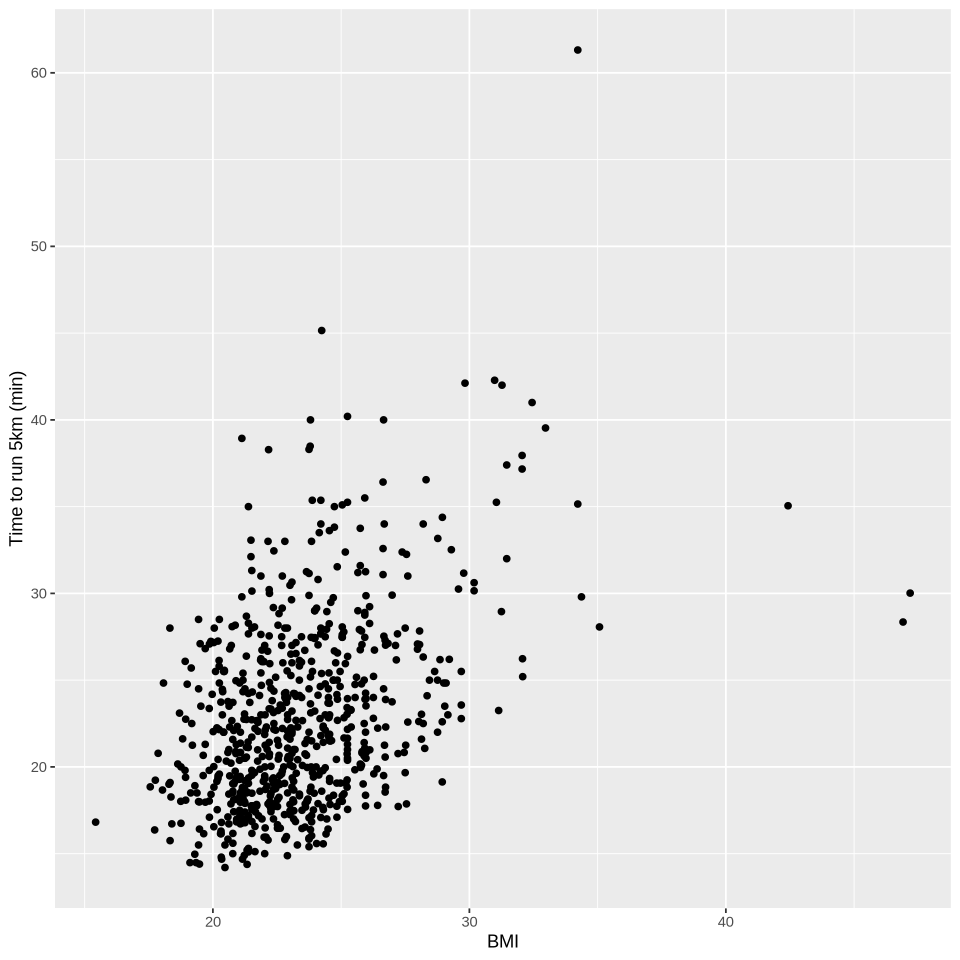

In [20]:
# Run this cell to see what your scatterplot looks like!
marathon_plot

In [21]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(marathon_plot$layers)), function(i) {c(class(marathon_plot$layers[[i]]$geom))[1]})), "70b88")), "0df4a26e70eecb169e76eafdf7d8b4d6"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(marathon_plot$layers)), function(i) {rlang::get_expr(c(marathon_plot$layers[[i]]$mapping, marathon_plot$mapping)$x)}), as.character))), "70b88")), "13f20fcd425c2cffd76e26f781baa4c4"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(marathon_plot$layers)), function(i) {rlang::get_expr(c(marathon_plot$layers[[i]]$mapping, marathon_plot$mapping)$y)}), as.character))), "70b88")), "03b227c165cbe5ecd1f00abaa368fef3"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$x)!= marathon_plot$labels$x), "70b88")), "d1162d8548273d17cfb68cdf10ccdc5b"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$y)!= marathon_plot$labels$y), "70b88")), "d1162d8548273d17cfb68cdf10ccdc5b"))
stopifnot("incorrect colour variable in marathon_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$colour)), "70b88")), "67146b846419764f60f89fcb1a55f4a8"))
stopifnot("incorrect shape variable in marathon_plot, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$shape)), "70b88")), "67146b846419764f60f89fcb1a55f4a8"))
stopifnot("the colour label in marathon_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$colour) != marathon_plot$labels$colour), "70b88")), "67146b846419764f60f89fcb1a55f4a8"))
stopifnot("the shape label in marathon_plot is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_plot$layers[[1]]$mapping, marathon_plot$mapping)$colour) != marathon_plot$labels$shape), "70b88")), "67146b846419764f60f89fcb1a55f4a8"))
stopifnot("fill variable in marathon_plot is not correct"= setequal(digest(paste(toString(quo_name(marathon_plot$mapping$fill)), "70b88")), "3e0893ac1be3589f1b396084665deee2"))
stopifnot("fill label in marathon_plot is not informative"= setequal(digest(paste(toString((quo_name(marathon_plot$mapping$fill) != marathon_plot$labels$fill)), "70b88")), "67146b846419764f60f89fcb1a55f4a8"))
stopifnot("position argument in marathon_plot is not correct"= setequal(digest(paste(toString(class(marathon_plot$layers[[1]]$position)[1]), "70b88")), "b62a1ae9166cfc3e3dce6fc191796d70"))

stopifnot("marathon_plot$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_plot$data)), "70b89")), "13c3de2cd9ccb322a1bcdc1275c4f82d"))
stopifnot("dimensions of marathon_plot$data are not correct"= setequal(digest(paste(toString(dim(marathon_plot$data)), "70b89")), "c2f860ac2c0660a1074b1613b882d52b"))
stopifnot("column names of marathon_plot$data are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_plot$data))), "70b89")), "fc594f4dff85f486971d8d09082e00b2"))
stopifnot("types of columns in marathon_plot$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_plot$data, class)))), "70b89")), "cea05224e554b4e433a802a058094e64"))
stopifnot("values in one or more numerical columns in marathon_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_plot$data, is.numeric))) sort(round(sapply(marathon_plot$data[, sapply(marathon_plot$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "70b89")), "e3d9904af03c622e9839de139764a2b9"))
stopifnot("values in one or more character columns in marathon_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_plot$data, is.character))) sum(sapply(marathon_plot$data[sapply(marathon_plot$data, is.character)], function(x) length(unique(x)))) else 0), "70b89")), "134d6d09edf539400684d43bcb48c6b0"))
stopifnot("values in one or more factor columns in marathon_plot$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_plot$data, is.factor))) sum(sapply(marathon_plot$data[, sapply(marathon_plot$data, is.factor)], function(col) length(unique(col)))) else 0), "70b89")), "134d6d09edf539400684d43bcb48c6b0"))

print('Success!')

[1] "Success!"


*Note: the warning message above tells us the number of rows that had missing data in the data set, and that these rows were not plotted. When you see something like this, you should stop and think, do I expect missing rows in my data? Sometimes the answer is yes, sometimes it is no. It depends on the data set, and you as the Data Scientist must know the answer to this. How would you determine the answer? By talking to those who collected the data and/or researching where the data came from, for example.*

**Question 1.9** 
<br> {points: 3}

Which option below **best** describes the plot above? 

A. For runners under the age of 35, there is no relationship at all between BMI and the time it takes to complete a 5 km race . 

B. For runners under 35, we see that as BMI increases the time it takes to complete a 5 km race increases. This suggests that there is a positive relationship between these two variables for runners under 35 in this data set. 

C. For runners under 35, we see that as BMI increases the time it takes to complete a 5 km decreases. This suggests that there is a negative relationship between these two variables for runners under 35 in this data set.

*Assign your answer to an object called `answer1.9`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [22]:
# Replace the fail() with your answer. 

answer1.9<-"B"# your code here
# No Answer - remove if you provide an answer

In [23]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('answer1.9') is not logical"= setequal(digest(paste(toString(class(exists('answer1.9'))), "f15f8")), "03be50897b0ba57790b12bf879b522bc"))
stopifnot("logical value of exists('answer1.9') is not correct"= setequal(digest(paste(toString(exists('answer1.9')), "f15f8")), "ec951c11199df0e75eb21392c322a494"))

print('Success!')

[1] "Success!"


**Question 1.10**
<br> {points: 1}

Now explore the relationship between the **age** of all runners and the time taken to complete the 5 km run (in minutes again). Using the original `marathon_small` data frame, mutate the `km5_time_seconds` column such that it is in minutes and name the new column `km5_time_minutes`. Save the resulting data frame to an object called `marathon_small_mins`.

Next, create a scatter plot (similar to the one in Question 1.9) but this time have `age` on the x-axis. Assign your plot to an object called `racetime_vs_age`.

There is a lot missing from the cell below (no hints were given). Try working on it on your own before looking at earlier questions in this tutorial or worksheet_01. 

*Don't forget to label your axes! Where appropriate, axes labels should also include units (for example, the axis that maps to the column `age` should have the unit "years").*

Warning message:
“Removed 446 rows containing missing values or values outside the scale range
(`geom_point()`).”


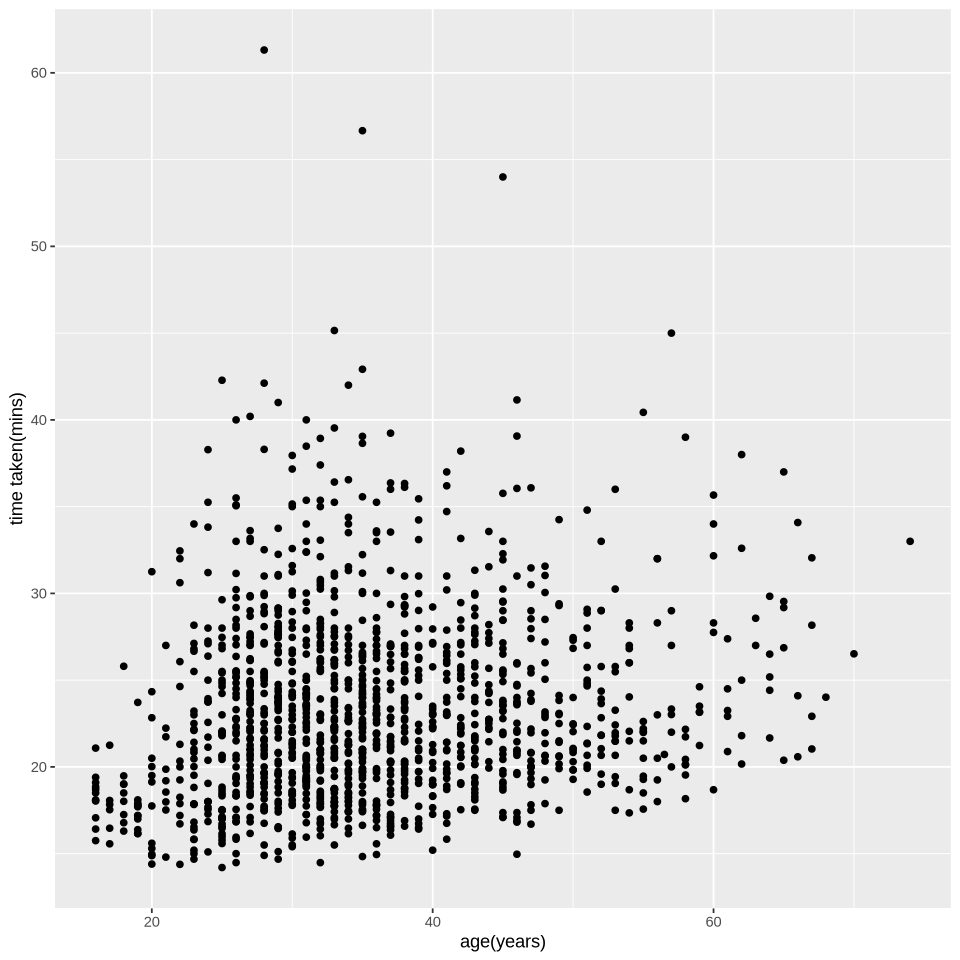

In [24]:
marathon_small_mins <- mutate(marathon_small, km5_time_minutes = km5_time_seconds/60)
racetime_vs_age<-ggplot(marathon_small_mins, aes(x=age, y=km5_time_minutes))+
                        geom_point()+
                        xlab("age(years)")+
                        ylab("time taken(mins)")# your code here

racetime_vs_age

In [25]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(racetime_vs_age$layers)), function(i) {c(class(racetime_vs_age$layers[[i]]$geom))[1]})), "e827f")), "01c148b348704c602d94b42892cca95e"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(racetime_vs_age$layers)), function(i) {rlang::get_expr(c(racetime_vs_age$layers[[i]]$mapping, racetime_vs_age$mapping)$x)}), as.character))), "e827f")), "8d73fe948db9edbec92d189e2ce27e0a"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(racetime_vs_age$layers)), function(i) {rlang::get_expr(c(racetime_vs_age$layers[[i]]$mapping, racetime_vs_age$mapping)$y)}), as.character))), "e827f")), "82bb6cc50d3ed7951abfc89e925e3723"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$x)!= racetime_vs_age$labels$x), "e827f")), "c88d7f3da9acae343f5072fbbb349223"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$y)!= racetime_vs_age$labels$y), "e827f")), "c88d7f3da9acae343f5072fbbb349223"))
stopifnot("incorrect colour variable in racetime_vs_age, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$colour)), "e827f")), "5309452075774750774904853ef86f78"))
stopifnot("incorrect shape variable in racetime_vs_age, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$shape)), "e827f")), "5309452075774750774904853ef86f78"))
stopifnot("the colour label in racetime_vs_age is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$colour) != racetime_vs_age$labels$colour), "e827f")), "5309452075774750774904853ef86f78"))
stopifnot("the shape label in racetime_vs_age is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(racetime_vs_age$layers[[1]]$mapping, racetime_vs_age$mapping)$colour) != racetime_vs_age$labels$shape), "e827f")), "5309452075774750774904853ef86f78"))
stopifnot("fill variable in racetime_vs_age is not correct"= setequal(digest(paste(toString(quo_name(racetime_vs_age$mapping$fill)), "e827f")), "595d9162b840a6f6634aa50cbe2b2174"))
stopifnot("fill label in racetime_vs_age is not informative"= setequal(digest(paste(toString((quo_name(racetime_vs_age$mapping$fill) != racetime_vs_age$labels$fill)), "e827f")), "5309452075774750774904853ef86f78"))
stopifnot("position argument in racetime_vs_age is not correct"= setequal(digest(paste(toString(class(racetime_vs_age$layers[[1]]$position)[1]), "e827f")), "73325ee61c13063e51a23d698cade8bb"))

stopifnot("racetime_vs_age$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(racetime_vs_age$data)), "e8280")), "65c7db2e11a5d1463b812f7aaad82c55"))
stopifnot("dimensions of racetime_vs_age$data are not correct"= setequal(digest(paste(toString(dim(racetime_vs_age$data)), "e8280")), "27efe318d7a4d0534f13d45a816065b5"))
stopifnot("column names of racetime_vs_age$data are not correct"= setequal(digest(paste(toString(sort(colnames(racetime_vs_age$data))), "e8280")), "2e88843535912557bfc17bf4a46fb6f9"))
stopifnot("types of columns in racetime_vs_age$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(racetime_vs_age$data, class)))), "e8280")), "f1f2e1fcbec6c9fd927b7bb93addb5af"))
stopifnot("values in one or more numerical columns in racetime_vs_age$data are not correct"= setequal(digest(paste(toString(if (any(sapply(racetime_vs_age$data, is.numeric))) sort(round(sapply(racetime_vs_age$data[, sapply(racetime_vs_age$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "e8280")), "3e904388c097f84853074b73da20c964"))
stopifnot("values in one or more character columns in racetime_vs_age$data are not correct"= setequal(digest(paste(toString(if (any(sapply(racetime_vs_age$data, is.character))) sum(sapply(racetime_vs_age$data[sapply(racetime_vs_age$data, is.character)], function(x) length(unique(x)))) else 0), "e8280")), "73e0f40b5adef82f43260f1ebccfd84c"))
stopifnot("values in one or more factor columns in racetime_vs_age$data are not correct"= setequal(digest(paste(toString(if (any(sapply(racetime_vs_age$data, is.factor))) sum(sapply(racetime_vs_age$data[, sapply(racetime_vs_age$data, is.factor)], function(col) length(unique(col)))) else 0), "e8280")), "e7f5ff1583481d5f4e31394023f743a6"))

print('Success!')

[1] "Success!"


**Question 1.11**
<br> {points: 3}

In the plot above, we can see a positive relationship between age and time taken to complete a 5 km run. Is this relationship strong (points are close together) or weak (points are more widely scattered)? 

Assign your answer (either `"weak"` or `"strong"`) to an object called `answer1.11`. Make sure to write in all lower-case and surround your answer with quotes.

In [26]:
# your code here
answer1.11<-"weak"# No Answer - remove if you provide an answer

In [27]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('answer1.11') is not logical"= setequal(digest(paste(toString(class(exists('answer1.11'))), "cce6")), "88974eafff3b60855bf88e7d4af0f5f8"))
stopifnot("logical value of exists('answer1.11') is not correct"= setequal(digest(paste(toString(exists('answer1.11')), "cce6")), "13ce791107a4a1dc8ddc7d73fd076e76"))

print('Success!')

[1] "Success!"


## 2. Bike-Sharing

Climate change, and solutions to mitigate it, is currently on the tongues and minds of many people. One healthy and environmentally friendly transportation alternative that has been recently gaining popularity is bike-sharing. Apart from their extensive real-world applications in improving health and creating more climate-friendly transit, the data generated by these bike-sharing systems makes them great for research. In contrast to bus and subway transit systems, bike-share transit systems precisely document where a trip starts, where it ends, and how long it lasts, for each individual using the system. This level of individual traceability may allow for better detection of mobility patterns in cities and possible detection of important events.

Today, we will be analyzing [data obtained from Capital Bikeshare](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#), a bike-sharing system from Washington, DC. The temperature data (in units of degrees Celsius) has been normalized from the original range so that all values fall between 0 and 1 (a common data processing technique helpful for some machine/statistical learning tools). Our goal is to determine if there is a relationship between temperature and the number of people renting bikes during the Spring (March 20th - June 21st). 

**Question 2.1** Multiple Choice
<br> {points: 1}

In comparison to bike-sharing systems, why aren't other modes of transportation as useful when it comes to acquiring data?

A. Not as fast. 

B. Documentation isn't as precise. 

C. Not as environmentally friendly. 

D. Bus drivers don't cooperate. 

*Assign your answer to an object called: `answer2.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [28]:
# Replace the fail() with your answer.

answer2.1<-"B"# your code here
 # No Answer - remove if you provide an answer

In [29]:
library(digest)
stopifnot("type of answer2.1 is not character"= setequal(digest(paste(toString(class(answer2.1)), "22849")), "d90ba3585361d70bbf3a76d04f14e74b"))
stopifnot("length of answer2.1 is not correct"= setequal(digest(paste(toString(length(answer2.1)), "22849")), "dc9527230cdfe4f61665ab101204f508"))
stopifnot("value of answer2.1 is not correct"= setequal(digest(paste(toString(tolower(answer2.1)), "22849")), "f9bbd34df3a8da618cc90facbd217ec4"))
stopifnot("letters in string value of answer2.1 are correct but case is not correct"= setequal(digest(paste(toString(answer2.1), "22849")), "4d009f9a550aa19ee589211514488dcd"))

print('Success!')

[1] "Success!"


**Question 2.2** Multiple Choice
<br> {points: 1}

What are the units for the normalized temperature?

A. Kelvin

B. Fahrenheit 

C. Celsius 

*Assign your answer to an object called: `answer2.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [30]:
# Replace the fail() with your answer.

answer2.2<-"C"# your code here
 # No Answer - remove if you provide an answer

In [31]:
library(digest)
stopifnot("type of answer2.2 is not character"= setequal(digest(paste(toString(class(answer2.2)), "497c0")), "86ba90e1de36883da78c1175413a09dd"))
stopifnot("length of answer2.2 is not correct"= setequal(digest(paste(toString(length(answer2.2)), "497c0")), "eae92ccee2d63965fb9b72147b5d334e"))
stopifnot("value of answer2.2 is not correct"= setequal(digest(paste(toString(tolower(answer2.2)), "497c0")), "a1bb33ce334e68e0c23024a2e684606c"))
stopifnot("letters in string value of answer2.2 are correct but case is not correct"= setequal(digest(paste(toString(answer2.2), "497c0")), "c3be65cbe60c569d51e890854ba958b9"))

print('Success!')

[1] "Success!"


**Question 2.3** 
<br> {points: 1}

Since we already have `tidyverse` loaded and ready to use, the first step is to read our new data. Add in the missing function and symbol to complete the cell below. Make sure to assign your answer to `bike_data`. 

In [32]:
#... <- ...("bike_share.csv")

bike_data<-read_csv("bike_share.csv")# your code here
 # No Answer - remove if you provide an answer
bike_data

Rows: 731 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): season
dbl (3): temperature, casual_users, registered_users

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


temperature,casual_users,registered_users,season
<dbl>,<dbl>,<dbl>,<chr>
0.344167,331,654,Spring
0.363478,131,670,Spring
0.196364,120,1229,Spring
⋮,⋮,⋮,⋮
0.253333,159,1182,Spring
0.255833,364,1432,Spring
0.215833,439,2290,Spring


In [33]:
library(digest)
stopifnot("bike_data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(bike_data)), "7efcf")), "07d13b3441cda5f08a438b25636dd798"))
stopifnot("dimensions of bike_data are not correct"= setequal(digest(paste(toString(dim(bike_data)), "7efcf")), "cae041362fd073ba08aa33b531ddde74"))
stopifnot("column names of bike_data are not correct"= setequal(digest(paste(toString(sort(colnames(bike_data))), "7efcf")), "15a5069cf2113feb35c79338f513df2d"))
stopifnot("types of columns in bike_data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(bike_data, class)))), "7efcf")), "08034ae2d53bba37ba80fe70bbed06e3"))
stopifnot("values in one or more numerical columns in bike_data are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_data, is.numeric))) sort(round(sapply(bike_data[, sapply(bike_data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "7efcf")), "d6874df3bbf1d1b7bb0bd78b79d7f424"))
stopifnot("values in one or more character columns in bike_data are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_data, is.character))) sum(sapply(bike_data[sapply(bike_data, is.character)], function(x) length(unique(x)))) else 0), "7efcf")), "71f5aae5e578b0b8e9fa04442ccc233c"))
stopifnot("values in one or more factor columns in bike_data are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_data, is.factor))) sum(sapply(bike_data[, sapply(bike_data, is.factor)], function(col) length(unique(col)))) else 0), "7efcf")), "adbf3ec3b2b1a195246e7b64265d7e1e"))

print('Success!')

[1] "Success!"


**Question 2.4** 
<br> {points: 1}

Mutate the data such that you have a new column called `total_users`. 
This column would be the sum of the `casual_users` and the `registered_users`. Assign your answer to an object called `bike_mutate`.

In [34]:
#... <- ...(bike_data, ...)

bike_mutate<-mutate(bike_data, total_users=casual_users+registered_users)# your code here
# No Answer - remove if you provide an answer
bike_mutate

temperature,casual_users,registered_users,season,total_users
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.344167,331,654,Spring,985
0.363478,131,670,Spring,801
0.196364,120,1229,Spring,1349
⋮,⋮,⋮,⋮,⋮
0.253333,159,1182,Spring,1341
0.255833,364,1432,Spring,1796
0.215833,439,2290,Spring,2729


In [35]:
library(digest)
stopifnot("bike_mutate should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(bike_mutate)), "bfd4f")), "b3f006529ae2ce24fe776af3649fe091"))
stopifnot("dimensions of bike_mutate are not correct"= setequal(digest(paste(toString(dim(bike_mutate)), "bfd4f")), "9e1b32d45244b84774fd73ff23d3f567"))
stopifnot("column names of bike_mutate are not correct"= setequal(digest(paste(toString(sort(colnames(bike_mutate))), "bfd4f")), "5bffbc32031df83d8b606dd8bec55eaf"))
stopifnot("types of columns in bike_mutate are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(bike_mutate, class)))), "bfd4f")), "15e22483442ccd58b5cb270b0a630400"))
stopifnot("values in one or more numerical columns in bike_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_mutate, is.numeric))) sort(round(sapply(bike_mutate[, sapply(bike_mutate, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "bfd4f")), "ec87b779159d8156a0c9b5e467b38cac"))
stopifnot("values in one or more character columns in bike_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_mutate, is.character))) sum(sapply(bike_mutate[sapply(bike_mutate, is.character)], function(x) length(unique(x)))) else 0), "bfd4f")), "41b0df99e38f5dec76c818c50a0ed75a"))
stopifnot("values in one or more factor columns in bike_mutate are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_mutate, is.factor))) sum(sapply(bike_mutate[, sapply(bike_mutate, is.factor)], function(col) length(unique(col)))) else 0), "bfd4f")), "45d6cfe985a2ead203e480db7365e5a7"))

print('Success!')

[1] "Success!"


**Question 2.5** 
<br> {points: 1}

Filter out the data to include information about rentals that were only made during `Spring`. Name your answer `bike_filter`. 

In [36]:
#... <- ...(bike_mutate, ... == "Spring")

bike_filter<-filter(bike_mutate,season=="Spring")# your code here
# No Answer - remove if you provide an answer
bike_filter

temperature,casual_users,registered_users,season,total_users
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.344167,331,654,Spring,985
0.363478,131,670,Spring,801
0.196364,120,1229,Spring,1349
⋮,⋮,⋮,⋮,⋮
0.253333,159,1182,Spring,1341
0.255833,364,1432,Spring,1796
0.215833,439,2290,Spring,2729


In [37]:
library(digest)
stopifnot("bike_filter should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(bike_filter)), "cf471")), "acaa072dc5f2f142ab7e855e9816af59"))
stopifnot("dimensions of bike_filter are not correct"= setequal(digest(paste(toString(dim(bike_filter)), "cf471")), "eaa448cddb7264931e102c4042218cd5"))
stopifnot("column names of bike_filter are not correct"= setequal(digest(paste(toString(sort(colnames(bike_filter))), "cf471")), "8b910a84b5435606c3804ec3f65eaff8"))
stopifnot("types of columns in bike_filter are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(bike_filter, class)))), "cf471")), "e95b0351fee69d0e0ac2e809dc114387"))
stopifnot("values in one or more numerical columns in bike_filter are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_filter, is.numeric))) sort(round(sapply(bike_filter[, sapply(bike_filter, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "cf471")), "0d5c334e614588a48fd8201f0dedb061"))
stopifnot("values in one or more character columns in bike_filter are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_filter, is.character))) sum(sapply(bike_filter[sapply(bike_filter, is.character)], function(x) length(unique(x)))) else 0), "cf471")), "97a9df0f053c52e29432b96ca92f4705"))
stopifnot("values in one or more factor columns in bike_filter are not correct"= setequal(digest(paste(toString(if (any(sapply(bike_filter, is.factor))) sum(sapply(bike_filter[, sapply(bike_filter, is.factor)], function(col) length(unique(col)))) else 0), "cf471")), "d9a29a02e9a5298e2a9381dfe86aafd6"))

print('Success!')

[1] "Success!"


**Question 2.6** 
<br> {points: 3}

Select the columns from the data that we wish to plot. Name your answer `bike_select`.

*Hint: if you have forgetten, scroll up and re-read the introduction to this exercise.* 

In [38]:
#... <- select(...)

bike_select<-select(bike_filter,temperature,total_users)# your code here
# No Answer - remove if you provide an answer
bike_select

temperature,total_users
<dbl>,<dbl>
0.344167,985
0.363478,801
0.196364,1349
⋮,⋮
0.253333,1341
0.255833,1796
0.215833,2729


In [39]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('bike_select') is not logical"= setequal(digest(paste(toString(class(exists('bike_select'))), "bdec5")), "ba586364f7ef249e2d92f7f83e4596b0"))
stopifnot("logical value of exists('bike_select') is not correct"= setequal(digest(paste(toString(exists('bike_select')), "bdec5")), "4f3b3be49445ef7a903fee4d2efe5337"))

print('Success!')

[1] "Success!"


**Question 2.7** 
<br> {points: 3}

Plot the data as a scatter plot. 

There is a lot missing from the cell below (no hints were given). Try completing this on your own before looking back at any previous exercises. Assign your plot to an object called `bike_plot_spring`.

*Hint: what do you think should be the x-axis / y-axis? Don't forget to label your axes! Where appropriate, axes labels should also include units (for example, the axis mapped to the `temperature` column should have the units "normalized degrees Celsius").*

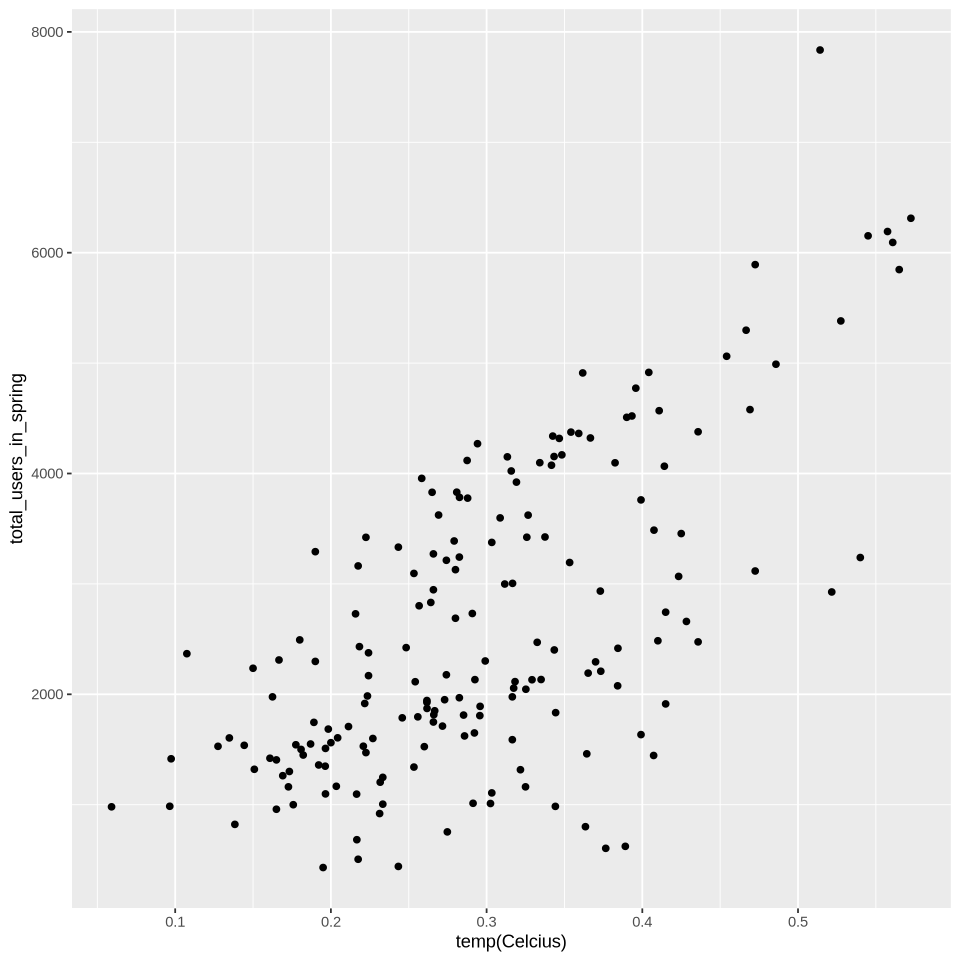

In [40]:
bike_plot_spring<-ggplot(bike_select,aes(x=temperature,y=total_users))+
                         geom_point()+
                         xlab("temp(Celcius)")+
                         ylab("total_users_in_spring")# your code here

bike_plot_spring

In [41]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('bike_plot_spring') is not logical"= setequal(digest(paste(toString(class(exists('bike_plot_spring'))), "a292f")), "21031319a77545498b6dafd6b6af0e04"))
stopifnot("logical value of exists('bike_plot_spring') is not correct"= setequal(digest(paste(toString(exists('bike_plot_spring')), "a292f")), "e16844a070023370ea4a566dc9aa4435"))

print('Success!')

[1] "Success!"


**Question 2.8** 
<br> {points: 3}

In 1-2 sentences, describe whether there is a relationship between the variables observed in the scatterplot of the data for the spring season. Comment on the direction and the strength of the relationship (if there is one), and how the variables change with respect to each other (if they do).

A decently strong positive correlation is seen between the temperature and bike users in springtime, as the total number of bike users increases as the temperature increases. 

## 3. Bike-Sharing Continued

For this exercise, we are going to continue working with Capital Bikeshare dataset. This part of the tutorial will focus on your understanding of how the functions work and test your ability to write code without hints. Note that we have also intentionally decreased the number of auto-graded questions for the remainder of the tutorial.

Unlike the previous exercise, we now want to determine if there is a relationship between temperature and the amount of people renting bikes during Fall (September 22nd - December 21st).  

*Try completing this Exercise from start to finish without any outside help. If you are struggling with a particular question, look at Exercise 2 for assistance.*

**Question 3.1** Multiple Choice
<br> {points: 1}

Which column is going to be filtered during this exercise?

A. `casual_users`

B. `season`

C. `temperature`

D. `total_users`

*Assign your answer to an object called `answer3.1`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [42]:
# Replace fail() with your answer. 

answer3.1<-"B" #your code here
# No Answer - remove if you provide an answer

In [43]:
library(digest)
stopifnot("type of answer3.1 is not character"= setequal(digest(paste(toString(class(answer3.1)), "cc60d")), "67ebd05f1595e697a8eef2c035bf85c6"))
stopifnot("length of answer3.1 is not correct"= setequal(digest(paste(toString(length(answer3.1)), "cc60d")), "7f1913ade3005311ac0bafadbabdd165"))
stopifnot("value of answer3.1 is not correct"= setequal(digest(paste(toString(tolower(answer3.1)), "cc60d")), "f1c4675ca2f00ee03484a459f2dc73ae"))
stopifnot("letters in string value of answer3.1 are correct but case is not correct"= setequal(digest(paste(toString(answer3.1), "cc60d")), "38710b0887cc1f7a77d89a80a1d77b4d"))

print('Success!')

[1] "Success!"


**Question 3.2** 
<br> {points: 3}

Recall that the `tidyverse` package has loaded and the data has already been read. The next step is to mutate the data such that we have information on all the users. Make sure to save your answer to an object called `bike_mutated`, and make sure to create a column called `total_users`.

In [45]:
# Replace fail() with your line of code. 
bike_mutated<-mutate(bike_data, total_users=casual_users+registered_users)
# your code here
# No Answer - remove if you provide an answer
bike_mutated

temperature,casual_users,registered_users,season,total_users
<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0.344167,331,654,Spring,985
0.363478,131,670,Spring,801
0.196364,120,1229,Spring,1349
⋮,⋮,⋮,⋮,⋮
0.253333,159,1182,Spring,1341
0.255833,364,1432,Spring,1796
0.215833,439,2290,Spring,2729


In [46]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('bike_mutated') is not logical"= setequal(digest(paste(toString(class(exists('bike_mutated'))), "14eee")), "eeaa8da80f0405de2fe15de15815ec7c"))
stopifnot("logical value of exists('bike_mutated') is not correct"= setequal(digest(paste(toString(exists('bike_mutated')), "14eee")), "1f1b8dbb7dee59b043af519ec6ec5850"))

print('Success!')

[1] "Success!"


**Question 3.3** 
<br> {points: 3}

Filter out the data to include information about rentals that were only made during `Fall` - assign this data frame to an object called `bike_filtered`. Next, select for the columns we wish to plot. Name your answer `bike_selected`. 

In [51]:
# Replace fail() with your line of code. 

bike_filtered<-filter(bike_mutated,season=="Fall")
bike_selected<-select(bike_filtered, total_users,temperature)# your code here
 # No Answer - remove if you provide an answer
bike_selected

total_users,temperature
<dbl>,<dbl>
4835,0.680833
4507,0.733333
4790,0.728333
⋮,⋮
7720,0.546667
8167,0.599167
8395,0.650000


In [52]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('bike_filtered') is not logical"= setequal(digest(paste(toString(class(exists('bike_filtered'))), "50184")), "804d90a84498b9dda75ba5829c359a09"))
stopifnot("logical value of exists('bike_filtered') is not correct"= setequal(digest(paste(toString(exists('bike_filtered')), "50184")), "a41cff2cc53212565e1729478980e3f1"))

stopifnot("type of exists('bike_selected') is not logical"= setequal(digest(paste(toString(class(exists('bike_selected'))), "50185")), "1a0cfc595199ec5a74489513b62ae2d4"))
stopifnot("logical value of exists('bike_selected') is not correct"= setequal(digest(paste(toString(exists('bike_selected')), "50185")), "65723e82b75522ebd36937996fd93af5"))

print('Success!')

[1] "Success!"


**Question 3.4** 
<br> {points: 3}

Plot the data as a scatter plot. Label your x-axis: `Temperature (normalized degrees Celsius)` and your y-axis: `Total Users (Casual and Registered)`. Assign your plot to an object called `bike_plot_fall`.

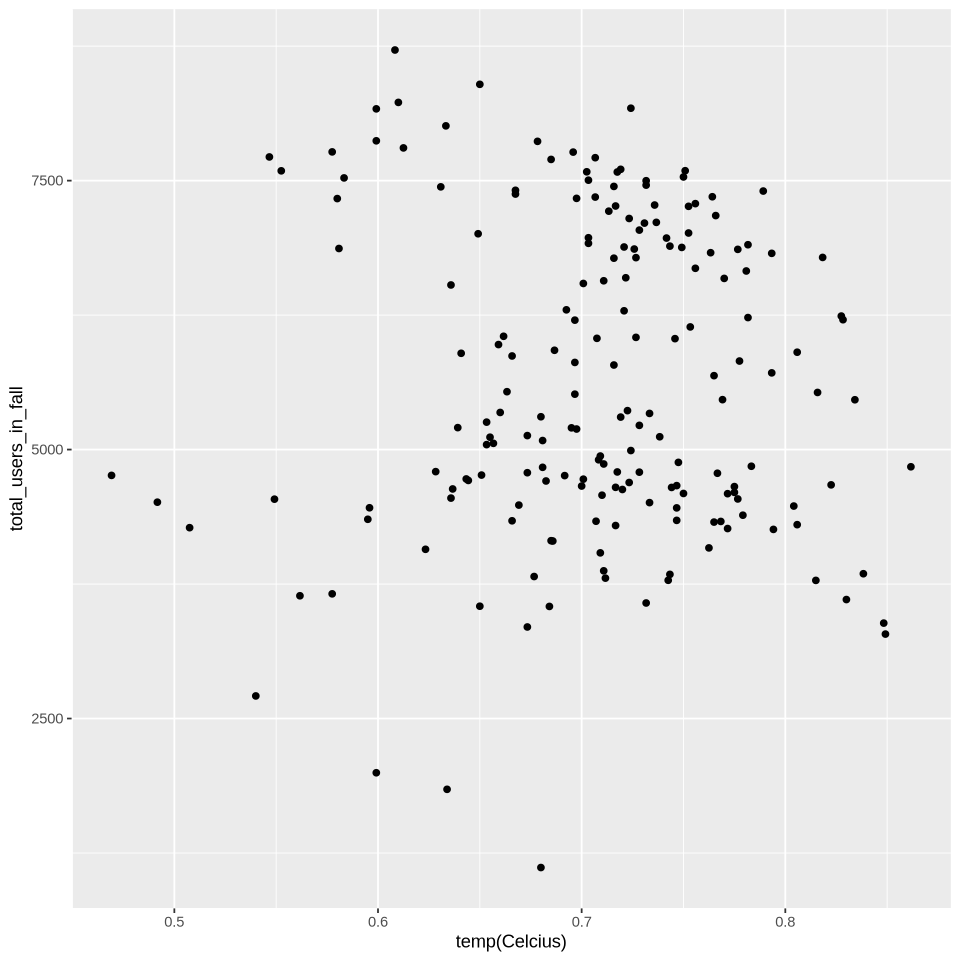

In [53]:
# Replace the fail() with your line of code (answer). 

bike_plot_fall<-ggplot(bike_selected,aes(x=temperature,y=total_users))+
                         geom_point()+
                         xlab("temp(Celcius)")+
                         ylab("total_users_in_fall")# your code here

# your code here
# No Answer - remove if you provide an answer
bike_plot_fall

In [54]:
# Most of the tests for this question are hidden. You have to decide whether you've created the right object. 
# Heres one test to at least ensure you named the object correctly:
library(digest)
stopifnot("type of exists('bike_plot_fall') is not logical"= setequal(digest(paste(toString(class(exists('bike_plot_fall'))), "dbde5")), "e4cbdd73fc1c843d48e2f78c0ed4cc33"))
stopifnot("logical value of exists('bike_plot_fall') is not correct"= setequal(digest(paste(toString(exists('bike_plot_fall')), "dbde5")), "f30f76dc258dc762616932d14144cfa7"))

print('Success!')

[1] "Success!"


**Question 3.5** 
<br> {points: 3}

In one sentence, describe whether there is a relationship observed in the scatter plot for the fall season, and if so, the direction of that relationship.

There is either none, or a very slight negative correlation between temperature and number of bike users.

**Question 3.6** 
<br> {points: 3}

Looking at the scatter plots for the spring and the fall seasons, what difference(s) do you see? Based on these two plots, what might you recommend to this company to increase their users?

1. The fall has more bike users in general, mostly ranging from 3000 to 8000, while about 1000 to 5000 people use bikes during springtime. The company should offer more bikes to share during the fall to accommodate the high demand, increasing their users.
2. During spring, the higher the temperature, the more people use shared bikes. The company should offer more bikes to share on hotter days so more people use their bikes.Additionally, they can provide discounts during non peak times such as springtime or colder days to encourage more people to become their users.

In [56]:
source("cleanup.R")